# Tasks

Machine Learning and Statistics

Winter 2023/2024

By Sadie Concannon
G00411297

***

## __Task 1 - Newton's Method to calculate square root__
***

> Square roots are difficult to calculate. In Python, you typically use the power operator (a double asterisk) or a package such as `math`. In this task, you should write a function `sqrt(x)` to approximate the square root of a floating point number x without
using the power operator or a package.

> Rather, you should use Newton’s method. Start with an initial guess for the square root called $z_0$. You then repeatedly
improve it using the following formula, until the difference between some previous guess $z_i$ and the next $z_{i+1}$ is less than some threshold, say 0.01.

$$ z_{i+1} = z_i − \frac{z_i × z_i − x}{2z_i} $$

In [2]:
#As per notes in lecture

def sqrt(x):
    # Starting with an initial guess for the square root.
    z = x / 4.0

    # Loop as this is an iterative approach until we are accurate within 0.01.
    #while (z could be improved):
    for i in range (100):
        # Newtons method for a better approximation
        z = z - (((z * z) - x) / (2 * z))

    # z should now be a good approximation for the square root
    return z

In [3]:
# Test the function on 3.
sqrt(3)

1.7320508075688774

In [4]:
# Using another method

# Writing a function that includes parameters
# x = the number for which to find the square root
# z = initial guess (set to 1.0)
# tol = the desired accuracy of the approximation (set to 10 decimal places)
# max_iterations = max number of iterations (set to 100)

def sqrt2(x, z=1, tol=1e-10, max_iteratons=100):
    iteration = 0
             
    while abs(z*z - x)>tol and iteration < max_iteratons:
        z = 0.5 * (z + x / z) #re arrange the formula
        iteration += 1
     
    return z

x=3
result = sqrt2(x)

result

1.7320508075688772

In [5]:
#Compare with Python
3**0.5  

1.7320508075688772

The results match. The sqrt2 function is closer aligned to Python. The Newton-Raphson method (also known as Newton's method) is a way to quickly find a good approximation for the root of a real-valued function $f(x)=0$. It uses the idea that a continuous and differentiable function can be approximated by a straight line tangent to it.


#### Notes

***

1. The calculation $z^2 - x$ is exactly zero when $z$ is the square root of $x$. It is greater than zero when $z$ is too big. It is less than zero when $z$ is too small. Thus $(z^2 - x)^2$ is a good candidate for a cost function.

2. The derivative of the numerator $z^2 - x$ with respect to $z$ is $2z$. That is the denominator of the fraction in the formula from the question.

***

## __Task 2 - Chi Square Test__
***

Consider the below contingency table based on a survey asking respondents whether they prefer coffee or tea and whether they
prefer plain or chocolate biscuits. Use `scipy.stats` to perform a `chi-squared test` to see whether there is any evidence of an association between drink preference and biscuit preference in this instance.
<table style="width:100%">
    <tr>
        <th colspan ="2" rowspan="2">&nbsp;</th>
        <th colspan="2">Biscuit</th>
    </tr>
    <tr>
        <td><i>Chocolate</i></td>
        <td><i>Plain</i></td>
    </tr>
    <tr>
        <th rowspan ="2">Drink</th>
        <td><i>Coffee</i></td>
        <td>43 </td>
        <td>57 </td>
    </tr>
    <tr>
        <td><i>Tea</i></td>
        <td>56 </td>
        <td>45 </td>
    </tr>
</table>

 


#### What is the Chi Square Test

Chi-square test is a test of independence of variables in a contingency table and is used to discover if there is a relationship between two categorical variables.

#### 1. Prepare the data frame

In [6]:

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html

# Data Frames
import pandas as pd
import numpy as np

# Shuffle
import random

# Statistics
import scipy.stats as ss
from scipy.stats.contingency import crosstab

In [7]:
# creating the raw data, followed method in lecture
coffee_chocolate = [['coffee','chocolate']]*43
coffee_plain = [['coffee','plain']]*57
tea_chocolate = [['tea','chocolate']]*56
tea_plain = [['tea','plain']]*45

raw_data = coffee_chocolate + coffee_plain + tea_chocolate + tea_plain
random.shuffle(raw_data)

drink, biscuit = list(zip(*raw_data))


In [8]:
#Create the data frame
df = pd.DataFrame({'drink': drink, 'biscuit': biscuit})

df

,drink,biscuit
0,coffee,chocolate
1,coffee,plain
2,coffee,plain
3,tea,plain
4,tea,plain
...,...,...
196,coffee,chocolate
197,coffee,plain
198,coffee,plain
199,coffee,plain


#### 2. Chi Square Contingency Table

##### Present the data set and perform the statistics

In [9]:
# Perform Cross Tabulation contingency
cross = ss.contingency.crosstab(df['drink'],df['biscuit'])

cross
#This result is just counting the unique values in the array

((array(['coffee', 'tea'], dtype=object),
  array(['chocolate', 'plain'], dtype=object)),
 array([[43, 57],
        [56, 45]]))

In [10]:
# To run the Chi-Square Test, the easiest way is to convert the data into a contingency table with frequencies.
# https://medium.com/swlh/how-to-run-chi-square-test-in-python-4e9f5d10249d

crosstab= pd.crosstab(df['drink'], df['biscuit']) 
crosstab

biscuit,chocolate,plain
drink,,
coffee,43,57
tea,56,45


In [11]:
# To get table by percentage preference
contigency_pct = pd.crosstab(df['drink'], df['biscuit'], normalize='all')
contigency_pct

biscuit,chocolate,plain
drink,,
coffee,0.213930,0.283582
tea,0.278607,0.223881


In [12]:
crosstab.count

<bound method DataFrame.count of biscuit  chocolate  plain
drink                    
coffee          43     57
tea             56     45>

##### Perform the test for independence

In [13]:
#using scipy stats do Chi2 Test for Independence
chi2, p, dof, expected = ss.chi2_contingency(crosstab, correction=False)

chi2, p, dof, expected


(3.113937364324669,
 0.07762509678333357,
 1,
 array([[49.25373134, 50.74626866],
        [49.74626866, 51.25373134]]))

In [14]:
chi2, p, dof, expected = ss.chi2_contingency(crosstab, correction=False)
expected

array([[49.25373134, 50.74626866],
       [49.74626866, 51.25373134]])

##### Calculating the Chi2

In [15]:
chi2

3.113937364324669

In [16]:
#Calculate the difference from expected frequency
CC=43-49.25373134
CP=57-50.74626866
TC=56-49.74626866
TP=45-51.25373134

CC, CP, TC, TP

(-6.253731340000002, 6.253731340000002, 6.253731340000002, -6.253731340000002)

In [17]:
CC2=(CC**2)/49.25373134
CP2=(CP**2)/50.74626866
TC2=(TC**2)/49.74626866
TP2=(TP**2)/51.25373134

CHI2Hand=(CC2 + CP2 + TC2 + TP2)
CHI2Hand

3.1139373610547243

In [18]:
Check = chi2-CHI2Hand
Check

3.269944759409782e-09

#### 3. Interpret the Results
The first value (3.114) is the Chi-square value, and then the P-Value is 0.07762509678333357 or 0.078 rounded to 3 decimal places, then comes the degrees of freedom (1), and lastly it outputs the expected frequencies as an array. If the significance level is 10% and the p-value is lower than this amount, this means that we can accept the null hypothesis with 90% confidence so we can take any p-value <0.1%. We can reject the null hypothesis as the p-value is less than 0.08 and therefore determine that there is no direct correlation between a preference to either a chocolate or plain biscuit dependent on whether the consumer has tea or coffee as their drink of choice. Since all the expected frequency are all $\frac{+}{}6.25$ the results can be relied upon.


*https://www.docpid.com/calculators/p-value#*

## __Task 3 - T Test__
***

Perform a `t-test` on the famous penguins data set to investigate whether there is evidence of a significant difference in the body
mass of male and female gentoo penguins.

#### What is the T Test

The `t-test` is used t0 tell us how significant the differences between group means are. It lets us know if those differences in means could have happened by chance. The `t-test` is usually used when data sets follow a normal distribution but the population variance is not known.

The `t` score is a ratio between the difference between the two groups and the difference within the groups.
- Larger `t` scores = more difference between groups.
- Smaller `t` score = more similarity between groups.
A `t` score of 3 tells you that the groups are three times as different from each other as they are within each other. So when you run a `t test`, bigger t-values equal a greater probability that the results are repeatable.

A p-value from a `t-test` is the probability that the results from your sample data occurred by chance. P-values are from $0%$ to $100%$ and are usually written as a decimal (for example, a p value of $5%$ is $0.05$). Low p-values indicate your data did not occur by chance. For example, a p-value of $.01$ means there is only a $1%$ probability that the results from an experiment happened by chance.

*https://www.statisticshowto.com/probability-and-statistics/t-test/*

#### Loading the dataset and performing the T-test

In [19]:
#Use seaborn library to access the penguins data set.
import seaborn as sns
from scipy.stats import ttest_ind

#Loading the penguins data set.
penguins = sns.load_dataset('penguins')

#Filter for Gentoo penguins.
gentoo_data=penguins[penguins['species'] == 'Gentoo']

#Separate the data for the male and female Gentoo penguins.
male_data=gentoo_data[gentoo_data['sex'] == 'Male']['body_mass_g']
female_data=gentoo_data[gentoo_data['sex'] == 'Female']['body_mass_g']


In [21]:
#Perform t-test

t_stat, p_value = ttest_ind(male_data, female_data, equal_var=False)


In [22]:
#Display the results T-Statistic
t_stat

14.761368414543291

In [23]:
# Display the P-Value
p_value

1.8677596749117468e-28

In [24]:
# Perform t-test using scipy stats.

ss.ttest_ind(male_data, female_data)

#Display results with labels
(f'T-statistic: {t_stat} P-value: {p_value}')


'T-statistic: 14.761368414543291 P-value: 1.8677596749117468e-28'

In [25]:
#Interpret the results
if p_value < 0.1:
    print('There is significant evidence of a difference in body mass between male and female Gentoo penguins.')
else: 
    print('There is no significant evidence of a difference in body mass between male and female Gentoo penguins.')

There is significant evidence of a difference in body mass between male and female Gentoo penguins.


#### Interpret the results

The t-test results provide information on whether there is a statistically significant difference in the body mass between male and female Gentoo pengiuns. The t-statistic measures the size of the difference relative to the variation in the data, and the p-value indicates the probability of observing such a difference by chance. 
*https://www.learntocalculate.com/calculate-p-value-from-t/*

Given the low value of the p-value it suggest we can reject the null hypothesis. If the significance level is 10% and the p-value is lower than this amount, this means that we can accept the null hypothesis with 90% confidence so we can take any p-value <0.1%. In this context rejecting the null hypothesis means there is a significant difference in body mass between male and female Gentoo penguins.
*https://www.docpid.com/calculators/p-value*

However, the t-test doesn't provide information about the difference i.e. which group is heavier - the males or the females? We would need to carry out further statistical analysis to gain insights into the distribution of the body mass of each group.






#### Further Analysis
****

In [26]:
#Descriptive statistics

male_stats = male_data.describe()
female_stats = female_data.describe()



In [27]:
male_stats

count      61.000000
mean     5484.836066
std       313.158596
min      4750.000000
25%      5300.000000
50%      5500.000000
75%      5700.000000
max      6300.000000
Name: body_mass_g, dtype: float64

In [28]:
female_stats

count      58.000000
mean     4679.741379
std       281.578294
min      3950.000000
25%      4462.500000
50%      4700.000000
75%      4875.000000
max      5200.000000
Name: body_mass_g, dtype: float64

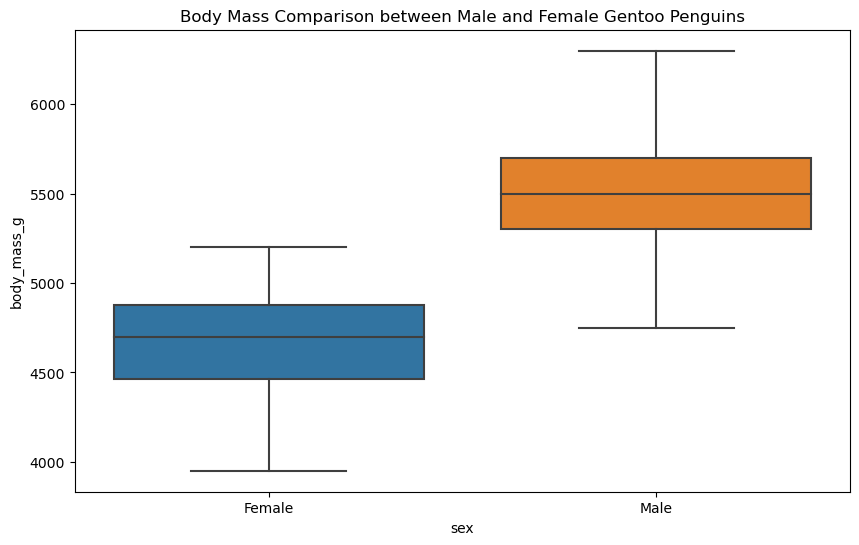

In [29]:
# Box Plot for visual comparison
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.boxplot(x='sex', y='body_mass_g', data=gentoo_data)
plt.title ('Body Mass Comparison between Male and Female Gentoo Penguins')
plt.show()


#### What more does this tell us

Firsty the visual can instantly tell us our `t-test result` was correct and there there is a significant difference in body mass between male and female Gentoo penguins. Using the `describe` function we could see there was a difference in the mean weights of the groups with the male group have a hhigher mean by $805g$.

Looking further at our `box plot` we can visually see this mean line (inside the box) is inline with what we got in the `describe` function. As the lines are at very different heights it further supports our conclusion that there is a significant difference in the weights of male compared to female Gentoo penguins. The boxes themselves are a similar width so we know the data sizes for each gender are close ($61$ Male & $58$ female). The whiskers do not suggest there are any significant outliers which could skew the hypothesis.

Doing this additional statistical analysis has complemented the `t-test` and provides further understanding of the data set.

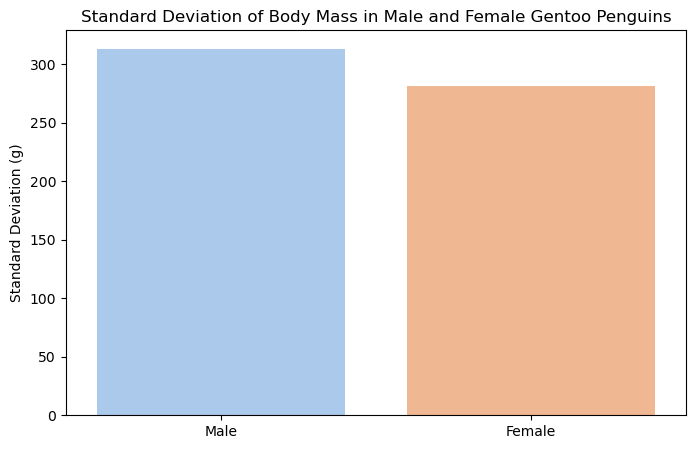

In [30]:
#Visually see the Standard Deviation
male_std=gentoo_data[gentoo_data['sex'] == 'Male']['body_mass_g'].std()
female_std=gentoo_data[gentoo_data['sex'] == 'Female']['body_mass_g'].std()

plt.figure(figsize=(8,5))
sns.barplot(x=['Male', 'Female'], y=[male_std, female_std], palette='pastel')
plt.title ('Standard Deviation of Body Mass in Male and Female Gentoo Penguins')
plt.ylabel('Standard Deviation (g)')
plt.show()


## __Task 4 - Iris Data Set__
***

Using the famous iris data set, suggest whether the setosa class is easily separable from the other two classes. 
Provide evidence for your answer.


#### Classification of the Iris Data Set

In [31]:
#Loading the Iris data set.

iris = sns.load_dataset('iris')

# Show to see the data frame
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


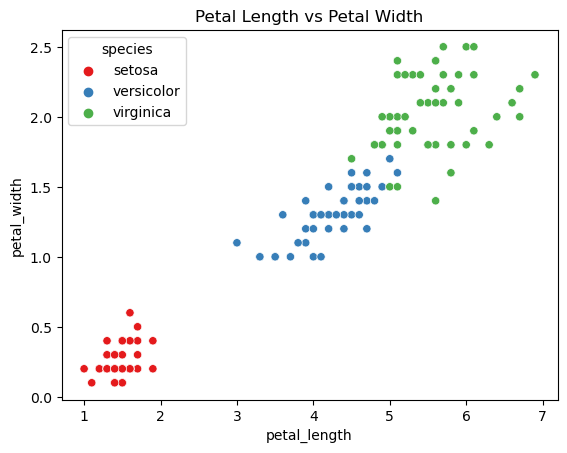

In [32]:
# Do a Scatter plot on petals of the Iris species
sns.scatterplot(x='petal_length', y='petal_width', data=iris, hue='species', palette='Set1')
plt.title('Petal Length vs Petal Width')
plt.show()

#From this scatter plot we can see the setosa is arranged out on it's own and doesn't overlap with the other two species

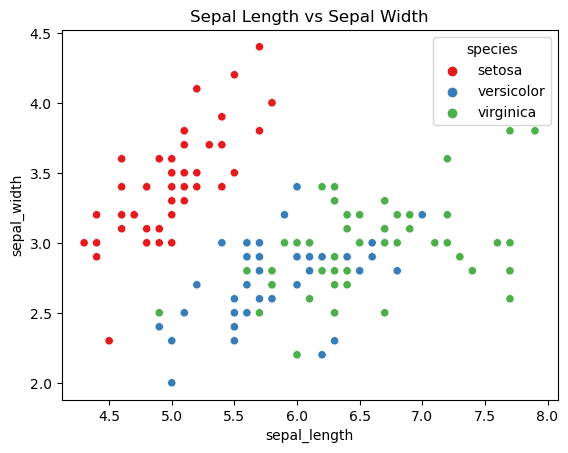

In [33]:
# Do a Scatter plot on seals of the Iris species
sns.scatterplot(x='sepal_length', y='sepal_width', data=iris, hue='species', palette='Set1')
plt.title('Sepal Length vs Sepal Width')
plt.show()

#Again whilst not as clustered we can see the setosa is arranged out on it's own in respect of the sepal attributes.

#### Classification
Now to use a classifier to further our analysis

In [34]:
# Machine Learning.
import sklearn as sk
from sklearn.neighbors import KNeighborsClassifier

# Create a new instance of a classifier.
clf = sk.neighbors.KNeighborsClassifier()

type(iris)

pandas.core.frame.DataFrame

In [35]:
# The X values.
X = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

# Show.
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [36]:
# Turn X into a numpy array.
X.to_numpy()

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [37]:
# y values.
y = iris['species']

# Show.
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [38]:
# Fit the data.

clf.fit(X, y)

KNeighborsClassifier()

In [39]:
# Look for NaNs
iris.isna()

#There are none in the Iris dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [40]:
iris.iloc[0]

sepal_length       5.1
sepal_width        3.5
petal_length       1.4
petal_width        0.2
species         setosa
Name: 0, dtype: object

In [41]:
# The first row of X.
X.iloc[0]

sepal_length    5.1
sepal_width     3.5
petal_length    1.4
petal_width     0.2
Name: 0, dtype: float64

In [42]:
# Quick check that the classifier correctly predicts first X sample.
clf.predict(X.iloc[:1])

array(['setosa'], dtype=object)

In [43]:
# The actual output for the first sample.
y.iloc[0]

'setosa'

In [44]:
# Keep some samples back for testing, train on the others. I will specify that the test size is 20% of the data set.
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
# Training inputs - noting the reduction in rows as the data set has been split into a train and test
X_train

,sepal_length,sepal_width,petal_length,petal_width
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


In [46]:
# The test data set has the balance of 38 rows
X_test.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,30.000000,30.000000,30.000000,30.000000
mean,5.980000,3.040000,3.883333,1.263333
std,0.845026,0.384708,1.841305,0.810910
min,4.700000,2.200000,1.300000,0.100000
25%,5.425000,2.800000,1.600000,0.325000
50%,6.050000,3.000000,4.500000,1.350000
75%,6.500000,3.200000,5.175000,2.000000
max,7.900000,3.800000,6.900000,2.300000


In [47]:
# Training outputs.
y_train

22         setosa
15         setosa
65     versicolor
11         setosa
42         setosa
          ...    
71     versicolor
106     virginica
14         setosa
92     versicolor
102     virginica
Name: species, Length: 120, dtype: object

In [48]:
# Create a new instance of a classifier including an option to adjust the numbere of neighbors
clf = sk.neighbors.KNeighborsClassifier(n_neighbors=3)

# Fit the model on the training data set.
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [49]:
# Predict based on test set.
y_pred = clf.predict(X_test)

y_pred

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa'], dtype=object)

In [50]:
# Proportion of correct classifications on test set.
(clf.predict(X_test) == y_test).sum() / X_test.shape[0]

1.0

In [51]:
# Evaluate the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


In [52]:
# Classification report 
from sklearn.metrics import classification_report

print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [53]:
# Create a new instance of a classifier.
clf = sk.neighbors.KNeighborsClassifier()

# Run cross-validation with five folds.
xvalidation = sk.model_selection.cross_val_score(clf, X, y)

xvalidation

array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])

#### Results

We were able to achieve 100% accuracy and generate a classification report based on the test data. The code split the Iris data set into a training and test set and we could determine the size of the test set at 20% of original data set. The results from the K Nearest Neighbor (KNN) model were able to provide insights into the separability of the Setosa species within the Iris data set. 

-Accuracy: the model returned an accuracy of $1.0$ which is the highest we can expect, indicating that the model performed well and correctly classified the species.
-Classification Report: the classification report returns the precision, recall and F1-score for each class. Returning a 1 for the setosa suggests the model can predict the setosa species which indicates a high level of separability.
-Cross Validation: this returns an array of scores for accuracy. It provides an average of performance and higher scores as close to $1.0$ indicate better generalisation. The high scores returned in the model suggest the model would perform well on new unseen data.

The model is performing well and this supports the what we saw in the scatter plot that the setosa species easily separable from the other two spcies in the Iris data set. When using classification methods it is worthwhile using two models to compare results to see which is more effective on the data set. We will now perform the Support Vector Machines (SVM) as it is an algorithm designed to find the optimal hyperplane in an N-dimensional space that can separate the data points in different classes in the feature space. 

*https://www.geeksforgeeks.org/support-vector-machine-algorithm/#How%20Does%20SVM%20Work*

In [54]:
from sklearn.svm import SVC

X1 = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y1 = iris['species']

X1_train, X1_test, y1_train, y1_test = sk.model_selection.train_test_split(X1, y1, test_size=0.2, random_state=42)

#Create the SVM classifier
svm_classifier = SVC(kernel='linear')

#Train the classifier
svm_classifier.fit(X1_train, y1_train)

#Make Predictions
Pred1=svm_classifier.predict(X1_test)


In [55]:
#Calculate accuracy
accuracy1=accuracy_score(y1_test, Pred1)
print(f"Accuracy: {accuracy1}")

Accuracy: 1.0


In [56]:
# Classification report 
from sklearn.metrics import classification_report

print("Classification Report:")
print(classification_report(y1_test, Pred1))

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [57]:
# Run cross-validation with five folds.
xvalidation1 = sk.model_selection.cross_val_score(svm_classifier, X1, y1)

xvalidation1

#The accuracy is the same as with KNN but when we consider cross validation we see better generalisation in KNN as the overall
#scores are higher. But there is not a significant difference between both as the setosa is clearly separable from the other two sepcies.

array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

## __Task 5 - Principal Component Analysis__
***

Perform Principal Component Analysis on the iris data set, reducing the number of dimensions to two. 
Explain the purpose of the analysis and your results.

In [58]:
from sklearn import datasets
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

#Load the data set using sklearn instead of seaborn as in previous question
iris=datasets.load_iris()
X=iris.data
y=iris.target

#Perform PCA to reduce the number of dimensions
pca=PCA(n_components=2) #specifying 2 as per the question
X_pca=pca.fit_transform(X)

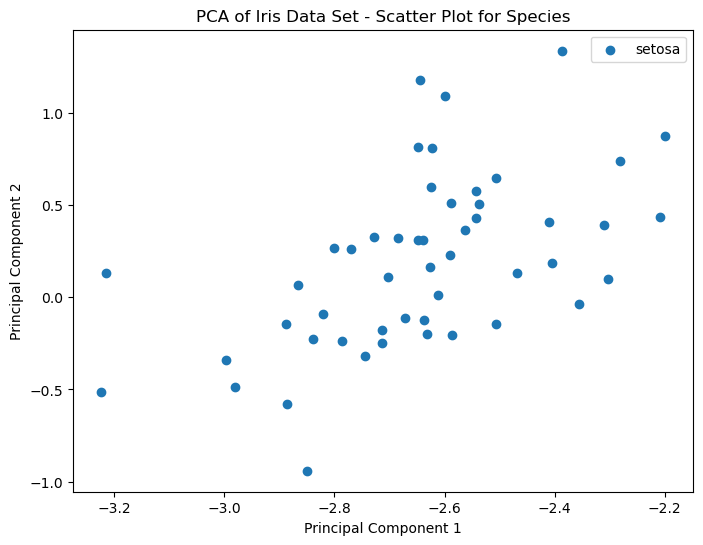

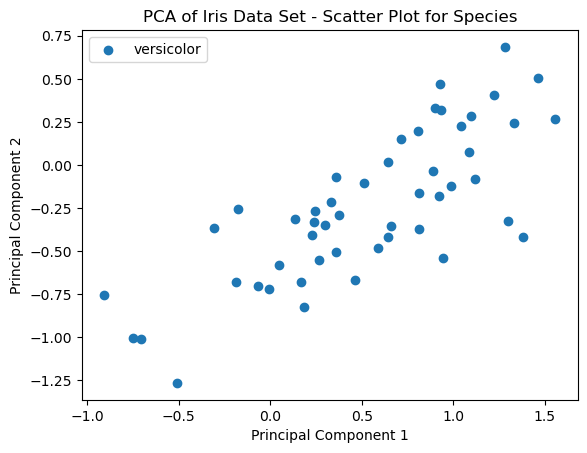

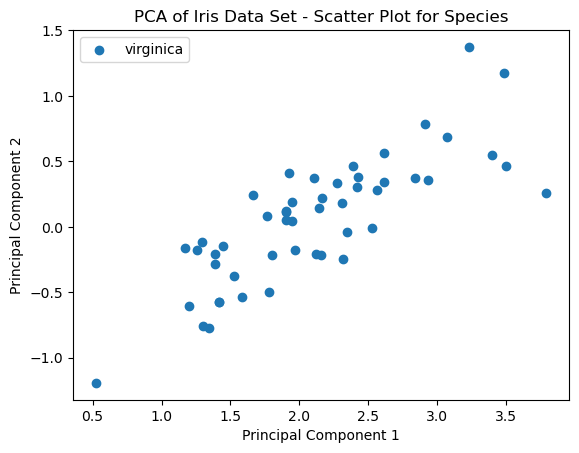

In [59]:
#Visualise the reduced data set
plt.figure(figsize=(8,6)) 
for i, target_name in enumerate(iris.target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=target_name)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('PCA of Iris Data Set - Scatter Plot for Species')
    plt.legend()
    plt.show()

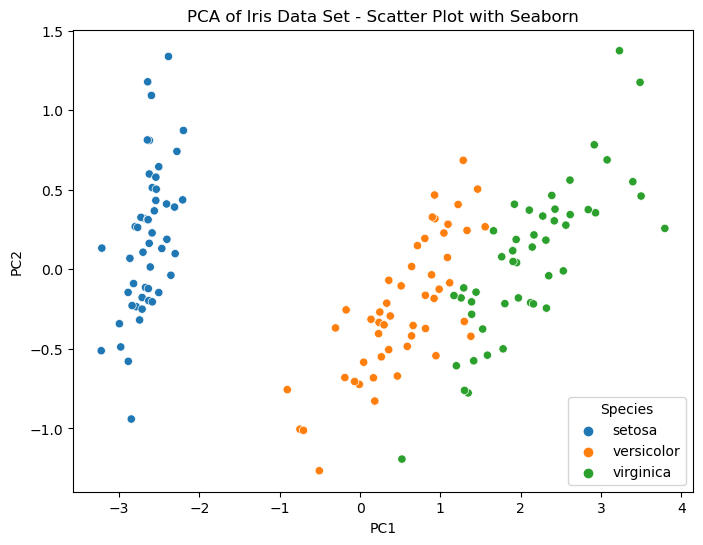

In [60]:
#Doing another scatterplot but this time putting all one one graph

import pandas as pd 
iris_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
iris_df['Species']=iris.target_names[y]

plt.figure(figsize=(8,6))
sns.scatterplot(data=iris_df, x='PC1', y='PC2', hue='Species')
plt.title('PCA of Iris Data Set - Scatter Plot with Seaborn')
plt.show()

#### Results

The two principal components we get from Principal Component Analysis (PCA) are not directly related to the original features (sepal length, sepal width, petal length, petal width). Instead PCA returns mathematical combinations of these features that best preserve the variance present in the data set.

The princial components are orthogonal to each other, meaning they are uncorrelated and capture different aspects of the variation in the data. The first principal component captures the most variance, follwed the second principal component and so on for data sets where we use more dimensions.

In relation to our results above:
1. Data Separation: The scatter plot shows how well separated or clusted the different classes of the Iris flowers are in the reduced dimension/space. If the classes are distinctly separated it indicates that the two principal components captured enough information to differentiate between the classes. The setosa species is clearly separable from the other two species.
2. Variance: The separation points along the axis represents the variance in the data captured by the components.
3. Relationship between Dimensions: The axes of the scatter plot correspond to the two principal components and the orientation and magnitude of the axes tell us how the original dimensions contribute to these components.

#### Purpose of Principal Component Analysis (PCA)
1. Reducing the number of Dimensions: The main purpose is to reduce the number of dimensions in a data set whilst preserving the most important information. It achieves this by transforming the original dimensions into a new set of orthogonal (uncorrelated features) called principal components.
2. Dimension Extraction: PCA can also be used to transform the original dimensions into a new set of dimensions (principal components) that might better represent the underlying data. 
3. Data Visualisation: By reducing the number of dimensions we can get a clearer visualisation of complex data sets. The supports the understanding of relationships, pattern and clusters within the data set.

Overall PCA is a valuable technique for simplifying complex data sets, highlighting important patterns and facilitating more efficient and effective analysis.

*https://royalsocietypublishing.org/doi/10.1098/rsta.2015.0202*


***
## End